In [42]:
import os
import re

import pandas as pd
import matplotlib.pyplot as plt

In [43]:
training_df = pd.read_json('training.json')
training_df

,text,category
0,\n\nCOMPUTER TERMINAL SYSTEMS <CPML> COMPLETES...,acq
1,\n\nOHIO MATTRESS <OMT> MAY HAVE LOWER 1ST QTR...,acq
2,\n\nMCLEAN'S <MII> U.S. LINES SETS ASSET TRANS...,acq
3,\n\nCHEMLAWN <CHEM> RISES ON HOPES FOR HIGHER ...,acq
4,\n\n<COFAB INC> BUYS GULFEX FOR UNDISCLOSED AM...,acq
...,...,...
11408,\n\nPEGASUS GOLD <PGULF> STARTS MILLING IN MON...,zinc
11409,"\n\nWORLD ZINC STOCKS FALL 7,700 TONNES IN FEB...",zinc
11410,\n\nLME DETAILS MARCH 1987 TURNOVER\n\n LON...,zinc
11411,\n\nBALL <BLL> TO SUPPLY PENNY BLANKS TO MINTS...,zinc


In [44]:
testing_df = pd.read_json('testing.json')
testing_df

,text,category
0,\n\nSUMITOMO BANK AIMS AT QUICK RECOVERY FROM ...,acq
1,\n\nBOND CORP STILL CONSIDERING ATLAS MINING B...,acq
2,\n\nCRA SOLD FORREST GOLD FOR 76 MLN DLRS - WH...,acq
3,\n\nANHEUSER-BUSCH JOINS BID FOR SAN MIGUEL\n\...,acq
4,\n\nMONIER SAYS BRITAIN'S REDLAND MAY BID FOR ...,acq
...,...,...
4019,\n\nFORCE MAJEURE LIFTED AT CAJAMARQUILLA\n\n ...,zinc
4020,\n\nNORANDA BRUNSWICK MINERS VOTE MONDAY ON CO...,zinc
4021,\n\nNO COMINCO STRIKE TALKS SCHEDULED\n\n T...,zinc
4022,\n\nAMAX ZINC CO RAISES DYECAST ALLOY PRICES\n...,zinc


In [45]:
training_df['category'].value_counts()

category
earn             2877
unknown          1830
acq              1650
money-fx          538
grain             433
                 ... 
cotton-oil          1
rye                 1
groundnut-oil       1
lin-oil             1
castor-oil          1
Name: count, Length: 91, dtype: int64

In [46]:
training_df['category'].value_counts().index

Index(['earn', 'unknown', 'acq', 'money-fx', 'grain', 'crude', 'trade',
       'interest', 'wheat', 'ship', 'corn', 'money-supply', 'dlr', 'sugar',
       'oilseed', 'coffee', 'gnp', 'gold', 'veg-oil', 'soybean', 'livestock',
       'bop', 'nat-gas', 'cpi', 'cocoa', 'reserves', 'carcass', 'copper',
       'jobs', 'yen', 'ipi', 'iron-steel', 'cotton', 'gas', 'rubber', 'barley',
       'rice', 'alum', 'palm-oil', 'meal-feed', 'sorghum', 'retail', 'zinc',
       'silver', 'pet-chem', 'wpi', 'tin', 'rapeseed', 'strategic-metal',
       'housing', 'hog', 'orange', 'lead', 'heat', 'soy-oil', 'soy-meal',
       'fuel', 'lei', 'sunseed', 'dmk', 'lumber', 'tea', 'income', 'nickel',
       'oat', 'l-cattle', 'platinum', 'rape-oil', 'instal-debt', 'sun-oil',
       'groundnut', 'coconut', 'coconut-oil', 'jet', 'cpu', 'propane',
       'potato', 'copra-cake', 'palladium', 'nzdlr', 'dfl', 'palmkernel',
       'rand', 'naphtha', 'sun-meal', 'nkr', 'cotton-oil', 'rye',
       'groundnut-oil', 'lin-oi

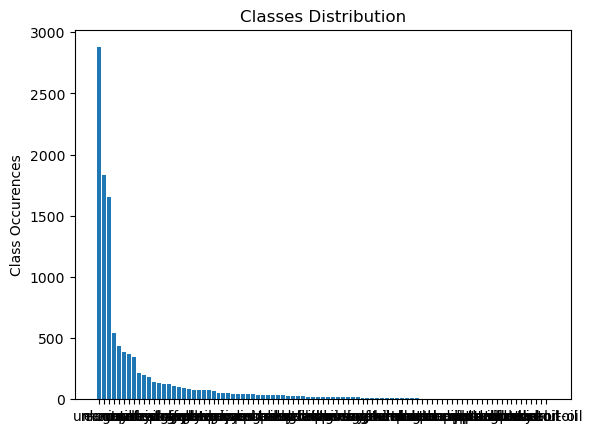

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

labels = training_df['category'].value_counts().index
values = training_df['category'].value_counts().values

ax.bar(labels, values)

ax.set_ylabel('Class Occurences')
ax.set_title('Classes Distribution')


plt.show()

### Classes with lowes appering frequency

In [48]:
(training_df['category'].value_counts() < 100).index

Index(['earn', 'unknown', 'acq', 'money-fx', 'grain', 'crude', 'trade',
       'interest', 'wheat', 'ship', 'corn', 'money-supply', 'dlr', 'sugar',
       'oilseed', 'coffee', 'gnp', 'gold', 'veg-oil', 'soybean', 'livestock',
       'bop', 'nat-gas', 'cpi', 'cocoa', 'reserves', 'carcass', 'copper',
       'jobs', 'yen', 'ipi', 'iron-steel', 'cotton', 'gas', 'rubber', 'barley',
       'rice', 'alum', 'palm-oil', 'meal-feed', 'sorghum', 'retail', 'zinc',
       'silver', 'pet-chem', 'wpi', 'tin', 'rapeseed', 'strategic-metal',
       'housing', 'hog', 'orange', 'lead', 'heat', 'soy-oil', 'soy-meal',
       'fuel', 'lei', 'sunseed', 'dmk', 'lumber', 'tea', 'income', 'nickel',
       'oat', 'l-cattle', 'platinum', 'rape-oil', 'instal-debt', 'sun-oil',
       'groundnut', 'coconut', 'coconut-oil', 'jet', 'cpu', 'propane',
       'potato', 'copra-cake', 'palladium', 'nzdlr', 'dfl', 'palmkernel',
       'rand', 'naphtha', 'sun-meal', 'nkr', 'cotton-oil', 'rye',
       'groundnut-oil', 'lin-oi

In [49]:
categories = (training_df['category'].value_counts() < 100).index

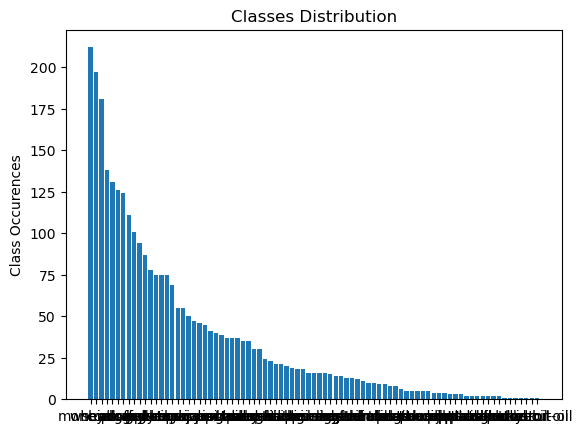

In [50]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

categories_frequencies = training_df['category'].value_counts() 
categories_frequencies = categories_frequencies[categories_frequencies < 250]

labels = categories_frequencies.index
values = categories_frequencies.values

ax.bar(labels, values)

ax.set_ylabel('Class Occurences')
ax.set_title('Classes Distribution')


plt.show()

In [51]:
categories_frequencies[categories_frequencies < 250].size

83

In [ ]:
labes = ['1-hid', '2-hid', '3-hid']
values = [0.2956, 0.2896, 0.2817]

plt.bar()